Phase 0 - accessing google drive and (eventually) unzipping file


In [ ]:
# we mount our google drive space
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ---- OPTIONAL
# in case we need to unzip the file
# i change current directoy with magic command
#%cd /content/drive/MyDrive/Colab Notebooks
# these are worth a look
#%lsmagic
#%who
# just checking
#%pwd

# unzipping file with executing system command
#!unzip Churn_Banking_Modeling.zip

/content/drive/MyDrive/Colab Notebooks
unzip:  cannot find or open Churn_Banking_Modeling.zip, Churn_Banking_Modeling.zip.zip or Churn_Banking_Modeling.zip.ZIP.


# Phase 1 - Data preparation

In [1]:
import pandas as pd
import numpy as np
# importing data from text file
# If we don't provide the right "encoding" parameter to the read_csv function we will get errors.
# tip: opening the csv file in a text editor may be of help in determining which is the econding of the file itself
# another way is to look for a python library that does it for us. You could check the "chardet" package.
# here a tutorial
# https://www.kaggle.com/code/rtatman/automatically-detecting-character-encodings
# dataset=pd.read_csv("/content/drive/MyDrive/Churn_Banking_Modeling.csv", sep=",", encoding=("ISO-8859-1"))
dataset = pd.read_csv("Churn_Banking_Modeling_ENG.csv")



In [2]:
dataset

,customer_id,flag_request_closure,amt_cust_value,flag_online_acc_opening,flag_mult_account_ownership,num_age,str_prov_domicile,str_prov_residence,num_year_first_account,str_profession,...,amt_current_liquidity,amt_current_managed,amt_current_administered,amt_6m_current_liquidity,amt_6m_current_managed,amt_6m_current_administered,flag_outgoing_sec_tranfer,flag_card_rejection,flag_loan_rejection,flag_deactivation_rid
0,2,no,65.03,0,0,38.0,BO,BO,2004.0,Impiegato,...,1634.57,2978.40,2980.92,1550.44,2853.20,2853.22,0,0,0,0
1,3,no,138.88,0,0,45.0,SA,SA,2000.0,Impiegato,...,11918.26,NaN,34916.15,26122.17,NaN,22053.82,0,0,0,0
2,4,no,546.54,0,0,61.0,VT,VT,2005.0,Altro/Nessuno,...,2671.95,NaN,232776.62,16545.25,NaN,216304.33,1,0,0,0
3,5,no,68.69,0,0,33.0,MI,MI,2010.0,Impiegato,...,19211.31,15013.53,15017.53,12500.00,NaN,NaN,0,0,0,0
4,7,no,2417.05,0,0,36.0,MI,MI,2001.0,Quadro,...,1526.38,NaN,NaN,1427.70,NaN,21514.60,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377364,555146,no,5317.47,1,0,49.0,NaN,NaN,2008.0,Avvocato,...,27933.94,197987.97,239399.96,31673.56,243236.45,285346.45,0,0,0,0
377365,555147,no,17.35,0,0,42.0,CT,CT,2002.0,Docente/Insegnante,...,-909.87,NaN,NaN,-2782.54,NaN,1098.68,0,0,0,0
377366,555148,no,334.73,0,0,54.0,RM,BZ,2001.0,Medico/Farmacista,...,72535.85,NaN,15017.53,66142.32,NaN,15208.61,0,0,0,0
377367,555149,no,5171.38,0,0,60.0,GE,GE,2007.0,Libero professionista/Titolare di impresa,...,115.87,338644.32,339296.07,154.64,276199.41,276199.47,0,0,0,0


In [3]:
# the target variable is key for our analysis
# we want it to be named as "Target"
# so we rename it
# Here the details
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
dataset = dataset.rename(columns={'flag_request_closure': 'Target'})

In [4]:
# We want the target variable values to be either 0 or 1
# that helps during model training and evaluation
# so we recode target variable
# here the details about the replace method
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
dataset.replace({'Target':{"si":1}},inplace=True)
dataset.replace({'Target':{"no":0}},inplace=True)

C:\Users\rtira\AppData\Local\Temp\ipykernel_37536\3960407272.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Target':{"no":0}},inplace=True)


In [5]:
# we have a look at the variable names
dataset

,customer_id,Target,amt_cust_value,flag_online_acc_opening,flag_mult_account_ownership,num_age,str_prov_domicile,str_prov_residence,num_year_first_account,str_profession,...,amt_current_liquidity,amt_current_managed,amt_current_administered,amt_6m_current_liquidity,amt_6m_current_managed,amt_6m_current_administered,flag_outgoing_sec_tranfer,flag_card_rejection,flag_loan_rejection,flag_deactivation_rid
0,2,0,65.03,0,0,38.0,BO,BO,2004.0,Impiegato,...,1634.57,2978.40,2980.92,1550.44,2853.20,2853.22,0,0,0,0
1,3,0,138.88,0,0,45.0,SA,SA,2000.0,Impiegato,...,11918.26,NaN,34916.15,26122.17,NaN,22053.82,0,0,0,0
2,4,0,546.54,0,0,61.0,VT,VT,2005.0,Altro/Nessuno,...,2671.95,NaN,232776.62,16545.25,NaN,216304.33,1,0,0,0
3,5,0,68.69,0,0,33.0,MI,MI,2010.0,Impiegato,...,19211.31,15013.53,15017.53,12500.00,NaN,NaN,0,0,0,0
4,7,0,2417.05,0,0,36.0,MI,MI,2001.0,Quadro,...,1526.38,NaN,NaN,1427.70,NaN,21514.60,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377364,555146,0,5317.47,1,0,49.0,NaN,NaN,2008.0,Avvocato,...,27933.94,197987.97,239399.96,31673.56,243236.45,285346.45,0,0,0,0
377365,555147,0,17.35,0,0,42.0,CT,CT,2002.0,Docente/Insegnante,...,-909.87,NaN,NaN,-2782.54,NaN,1098.68,0,0,0,0
377366,555148,0,334.73,0,0,54.0,RM,BZ,2001.0,Medico/Farmacista,...,72535.85,NaN,15017.53,66142.32,NaN,15208.61,0,0,0,0
377367,555149,0,5171.38,0,0,60.0,GE,GE,2007.0,Libero professionista/Titolare di impresa,...,115.87,338644.32,339296.07,154.64,276199.41,276199.47,0,0,0,0


In [6]:
# for sake fo simplicity
# here we choose to just work on numerical variables
# var_to_use = ['Target', 'Imp_Valore_del_Cliente',
#        'Flag_Apertura_Conto_Online', 'Flag_Possesso_piu_Conti', 'Eta',
#        'Anno_Apertura_primo_Conto', 'Imp_Canone_Pricing_cc',
#        'Imp_Bonifici_vs_Competitors', 'Imp_Bonifici_vs_No_Competitors',
#        'Num_Utenze_in_essere', 'Flag_Accredito_Stipendio',
#        'Imp_Spending_Carta_Credito', 'Imp_Spending_Bancomat',
#        'Num_Accessi_Sito', 'Num_Movimenti_Dispositivi', 'Num_attività_trading',
#        'Var_Numero_Utenze', 'Flag_Mutuo', 'Flag_Prestito', 'Flag_Giroconto',
#        'Flag_Richiesta_info_chiusura_conto', 'Iscrizione_programma_Loyalty',
#        'Flag_Contatto_Call_Center', 'Flag_variazione_Accredito_Stipendio',
#        'Num_Punti_Programma_Loyalty', 'Imp_Liquidità_Attuale',
#        'Imp_Gestito_attuale', 'Imp_Amministrato_attuale',
#        'Imp_Liquidità_Attuale_6m', 'Imp_Gestito_attuale_6m',
#        'Imp_Amministrato_attuale_6m', 'Flag_Trasferimento_Titoli_Out',
#        'Flag_Rifiuto_Carte', 'Flag_Rifiuto_Prestiti',
#        'Flag_Disattivazione_RID']
# len(var_to_use)

In [7]:
# for sake of simplicity
# here we choose to just work on numerical variables
var_to_use = [
    'Target', 'amt_cust_value', 'flag_online_acc_opening',
       'flag_mult_account_ownership', 'num_age',
       'num_year_first_account',
       'amt_pricing_fee', 'amt_transfer_vs_competitors',
       'amt_tranfers_vs_no_competitors', 'num_existing_services',
       'flag_salary_deposit', 'amt_credit_card_spending',
       'amt_debit_card_spending', 'num_website_access_count',
       'num_transactions_count', 'num_trading_activities_count',
       'str_change_num_utilities', 'flag_mortgage', 'flag_loan',
       'flag_internal_tranfers', 'flag_request_info_closure',
       'flag_loyalty_program_enrol', 'flag_call_center_contact',
       'flag_salary_deposit_variation', 'num_loyalty_points',
       'amt_current_liquidity', 'amt_current_managed',
       'amt_current_administered', 'amt_6m_current_liquidity',
       'amt_6m_current_managed', 'amt_6m_current_administered',
       'flag_outgoing_sec_tranfer', 'flag_card_rejection',
       'flag_loan_rejection', 'flag_deactivation_rid'
]


In [8]:
# i like to create list with all feature names (all variables except target)
# that may be useful later in constructing training datasets
features_names =  var_to_use.copy()
features_names.remove('Target')


In [9]:
# i remove all the variables that won't be used
dataset = dataset[var_to_use].copy() # why do we use .copy()?


In [10]:
# impute all missing values to zero
# here some detail about the fillna method
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
dataset[features_names] = dataset[features_names].fillna(0)


In [11]:
# create the "features" dataframe with just feature variables (remove target)
# we use the "drop" method
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
features = dataset.drop('Target', axis = 1)

In [12]:
# create array with target variable
# we access the DataFrame "values" attribute
target = dataset[['Target']].values

In [13]:
dataset

,Target,amt_cust_value,flag_online_acc_opening,flag_mult_account_ownership,num_age,num_year_first_account,amt_pricing_fee,amt_transfer_vs_competitors,amt_tranfers_vs_no_competitors,num_existing_services,...,amt_current_liquidity,amt_current_managed,amt_current_administered,amt_6m_current_liquidity,amt_6m_current_managed,amt_6m_current_administered,flag_outgoing_sec_tranfer,flag_card_rejection,flag_loan_rejection,flag_deactivation_rid
0,0,65.03,0,0,38.0,2004.0,0.000000,0.000,812.800000,3.0,...,1634.57,2978.40,2980.92,1550.44,2853.20,2853.22,0,0,0,0
1,0,138.88,0,0,45.0,2000.0,0.000000,6260.820,828.120000,7.0,...,11918.26,0.00,34916.15,26122.17,0.00,22053.82,0,0,0,0
2,0,546.54,0,0,61.0,2005.0,0.000000,4330.000,1076.666666,9.0,...,2671.95,0.00,232776.62,16545.25,0.00,216304.33,1,0,0,0
3,0,68.69,0,0,33.0,2010.0,0.000000,0.000,0.000000,0.0,...,19211.31,15013.53,15017.53,12500.00,0.00,0.00,0,0,0,0
4,0,2417.05,0,0,36.0,2001.0,0.000000,0.000,1200.000000,0.0,...,1526.38,0.00,0.00,1427.70,0.00,21514.60,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377364,0,5317.47,1,0,49.0,2008.0,0.000000,13.005,19524.800000,0.0,...,27933.94,197987.97,239399.96,31673.56,243236.45,285346.45,0,0,0,0
377365,0,17.35,0,0,42.0,2002.0,0.000000,25.900,404.823333,11.0,...,-909.87,0.00,0.00,-2782.54,0.00,1098.68,0,0,0,0
377366,0,334.73,0,0,54.0,2001.0,0.000000,926.615,3237.045000,8.0,...,72535.85,0.00,15017.53,66142.32,0.00,15208.61,0,0,0,0
377367,0,5171.38,0,0,60.0,2007.0,0.000000,0.000,0.000000,0.0,...,115.87,338644.32,339296.07,154.64,276199.41,276199.47,0,0,0,0


# Phase 2 - Modeling

## Modeling - Part 1 - First attempt - We just model data as it is

In [14]:
# The Pandas package is for data manipulation
# when it's about modeling we need another one
# the scikit-learn is probably the most popular one
# https://scikit-learn.org
# we will import all the objects we need for modeling from it

In [15]:
# in order to prevent overfitting
# we generate train and test sample
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
(train_X, test_X, train_y, test_y) = train_test_split(features, target, train_size=0.7, random_state=1)
# suggestion: have a look at shapes of such datasets

In [16]:
# Let's have a look at the target variable
# we can do it by making use of some package that was made for it
from collections import Counter
print("train target count : ", Counter(train_y[:,0]))
# can be done in many ways
# unique, counts = np.unique(train_y[:,0], return_counts=True)

# let's look at results:  ring any bell?


train target count :  Counter({np.int64(0): 262759, np.int64(1): 1399})


In [17]:
# we start training a tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
# we instantiate  the classifier
dtc = DecisionTreeClassifier()
# we train it
dtc.fit(train_X, train_y)

DecisionTreeClassifier()

In [17]:
# we use the model to make predictions (and generate scores) on the test dataset
label_pred_test = dtc.predict(test_X)
score_test = dtc.predict_proba(test_X)

# (this is less useful) - predict on training dataset
label_pred_train = dtc.predict(train_X)
score_train = dtc.predict_proba(train_X)
# let's take a look at the generated scores
set(score_test[:,1])

{np.float64(0.0), np.float64(0.2), np.float64(0.5), np.float64(1.0)}

In [ ]:
test_y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

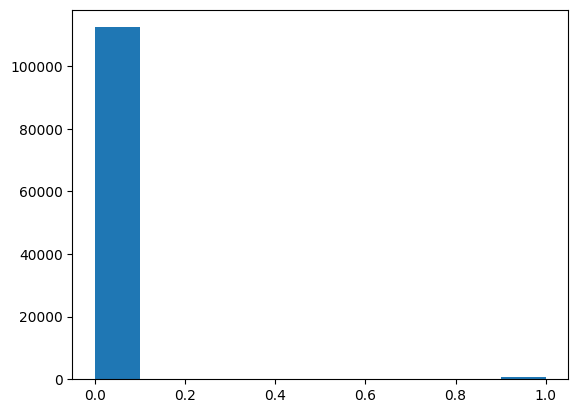

In [ ]:
# let's have a look at the score distribution
# anything strange?
# we use the matplotlib library
# https://matplotlib.org/
# import the package
from matplotlib import pyplot as plt
# generate the histogram
plt.hist(score_test[:,1])
# plot it
plt.show()

col_0         0         1
row_0                    
0.0    0.995288  0.004712
0.2    1.000000  0.000000
0.5    1.000000  0.000000
1.0    0.926730  0.073270


<Axes: xlabel='row_0'>

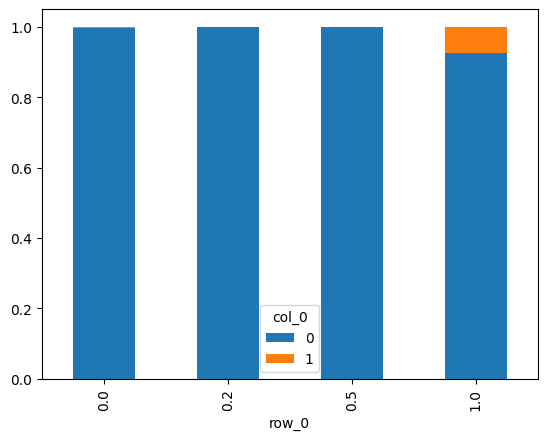

In [18]:
# let's have a deeper look at what happens
# in each score bin
# let's compute crosstab between score bins and target variable
# we then look at row marginal
score_test_analysis = pd.crosstab(score_test[:,1], test_y[:,0], normalize = 'index')
print(score_test_analysis) # what do we see?
# we can also plot
score_test_analysis.plot.bar(stacked=True)

In [19]:
# we look at confusion matrix
# https://en.wikipedia.org/wiki/Confusion_matrix
# what do you see?
from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(test_y,label_pred_test)
print(cm_test)


[[111944    683]
 [   530     54]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(train_y,label_pred_train)
print(cm_test)

[[262759      0]
 [     2   1397]]


In [ ]:
# ----------------- Tree Visualization -------------------
# python-graphviz package is requested
# better to do that by "Anaconda user interface"
# in Google COlab everything is set up!

# Beware - the tree may be huge
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None
                                ,feature_names=features_names
                                ,class_names=["no", "si"]
                                ,filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

#################################################################################


Modeling - Part 2 - We try to manage Class Imbalance

In [20]:
# We choose to perform undersampling
# We may do it manually
# but...guess what? We will use a package
# https://imbalanced-learn.org/stable/
# may need to install the  package (pip install imbalanced-learn)
# (just for anaconda) maybe we have to add
# https://conda.anaconda.org/conda-forge/
# to channels
# we import  the package
from imblearn.under_sampling import RandomUnderSampler
# we choose to set 20% as undersampling percentage
undersample = RandomUnderSampler(sampling_strategy=0.2)
# we generate balanced train dataset
train_X_bal, train_y_bal = undersample.fit_resample(train_X, train_y)
# why are we not undersampling the test set?

In [22]:
# we retrain the tree
# with the undersampled dataset
from sklearn.tree import DecisionTreeClassifier
# we define the classifier
dtc2 = DecisionTreeClassifier()
# dtc = DecisionTreeClassifier(max_depth=5)
# we train the classifier
dtc2.fit(train_X_bal, train_y_bal)

DecisionTreeClassifier()

In [23]:
# we use the model to make predictions and get scores on
# the test dataset
label_pred_test_2 = dtc2.predict(test_X)
score_test_2 = dtc2.predict_proba(test_X)
# (less useful) - same on  training dataset
label_pred_train_2 = dtc2.predict(train_X_bal)
score_train_2 = dtc2.predict_proba(train_X_bal)
# let's take a look at the generated scores
set(score_test_2[:,1])

{np.float64(0.0), np.float64(1.0)}

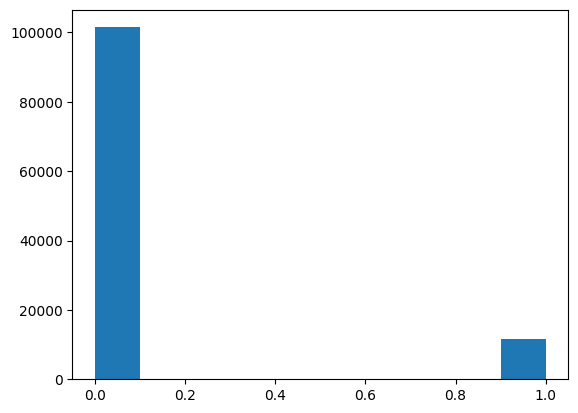

In [ ]:
# again - let's have a look at the score distribution
from matplotlib import pyplot as plt
plt.hist(score_test_2[:,1])
plt.show()
# no success yet!

col_0         0         1
row_0                    
0.0    0.997428  0.002572
1.0    0.972513  0.027487


<Axes: xlabel='row_0'>

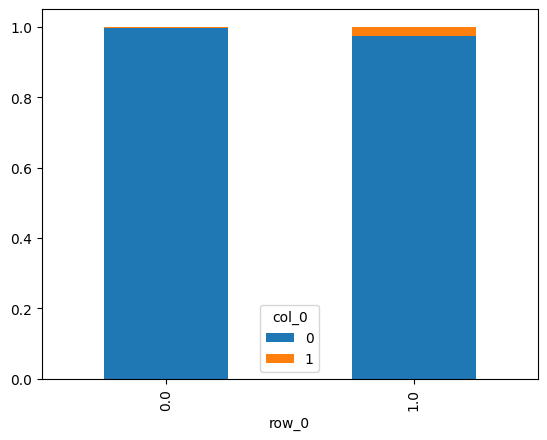

In [ ]:
# let's have a deeper look at what happens
# in each score bin
# let's compute crosstab between score bins and target variable
# we then look at row marginal (normalize = 'index')
score_test_2_analysis = pd.crosstab(score_test_2[:,1], test_y[:,0], normalize = 'index')
print(score_test_2_analysis) # what do we see?
# we can also plot
score_test_2_analysis.plot.bar(stacked=True)

In [ ]:
# again- we look at confusion matrix
# what do you see?
from sklearn.metrics import confusion_matrix
cm_test_2=confusion_matrix(test_y,label_pred_test_2)
print(cm_test_2)

[[101199  11428]
 [   261    323]]


In [ ]:
dtc.get_n_leaves()

2517

## Modeling - Part 3 - Hyperparameter Tuning

In [24]:
# we start training a tree
from sklearn.tree import DecisionTreeClassifier
# we define the classifier
# and we set an hyperameter - tree must not be deeper than 5 levels
dtc3 = DecisionTreeClassifier(min_samples_leaf=50)
# dtc3 = DecisionTreeClassifier(max_depth=7)
# we train the classifier
dtc3.fit(train_X_bal, train_y_bal)

DecisionTreeClassifier(min_samples_leaf=50)

In [25]:
# again, we get predictions and scores on  test dataset
label_pred_test_3 = dtc3.predict(test_X)
score_test_3 = dtc3.predict_proba(test_X)
# (less useful) - predict on trainign dataset
label_pred_train_3 = dtc3.predict(train_X_bal)
score_train_3 = dtc3.predict_proba(train_X_bal)
# let's take a look at the generated scores
set(score_test_3[:,1])

{np.float64(0.0),
 np.float64(0.02),
 np.float64(0.023809523809523808),
 np.float64(0.03076923076923077),
 np.float64(0.03278688524590164),
 np.float64(0.038461538461538464),
 np.float64(0.039473684210526314),
 np.float64(0.04),
 np.float64(0.0410958904109589),
 np.float64(0.05555555555555555),
 np.float64(0.056818181818181816),
 np.float64(0.05813953488372093),
 np.float64(0.058823529411764705),
 np.float64(0.06),
 np.float64(0.06060606060606061),
 np.float64(0.06779661016949153),
 np.float64(0.0684931506849315),
 np.float64(0.07352941176470588),
 np.float64(0.07407407407407407),
 np.float64(0.0851063829787234),
 np.float64(0.08602150537634409),
 np.float64(0.08955223880597014),
 np.float64(0.09090909090909091),
 np.float64(0.1),
 np.float64(0.11235955056179775),
 np.float64(0.11538461538461539),
 np.float64(0.11594202898550725),
 np.float64(0.12),
 np.float64(0.125),
 np.float64(0.14),
 np.float64(0.14754098360655737),
 np.float64(0.16),
 np.float64(0.16666666666666666),
 np.float64(

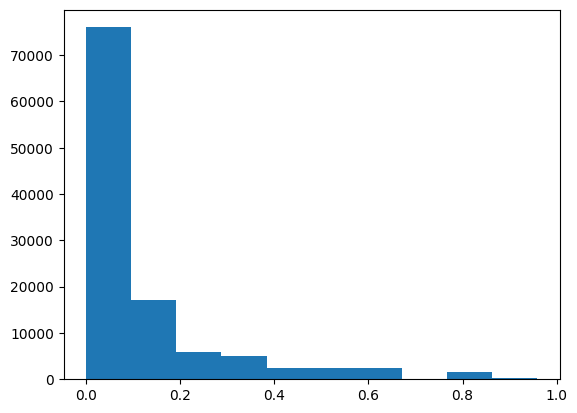

In [ ]:
# let's have a look at the score distribution
from matplotlib import pyplot as plt
plt.hist(score_test_3[:,1])
plt.show()
# something changed!

In [ ]:
# we look at confusion matrix
# what do we see?
from sklearn.metrics import confusion_matrix
cm_test_3=confusion_matrix(test_y,label_pred_test_3)
print(cm_test_3)

[[107160   5467]
 [   322    262]]


col_0                       0         1
row_0                                  
(-0.000958, 0.0958]  0.998908  0.001092
(0.0958, 0.192]      0.996388  0.003612
(0.192, 0.288]       0.987462  0.012538
(0.288, 0.383]       0.992108  0.007892
(0.383, 0.479]       0.981788  0.018212
(0.479, 0.575]       0.976634  0.023366
(0.575, 0.671]       0.972585  0.027415
(0.767, 0.862]       0.927338  0.072662
(0.862, 0.958]       0.816327  0.183673


<Axes: xlabel='row_0'>

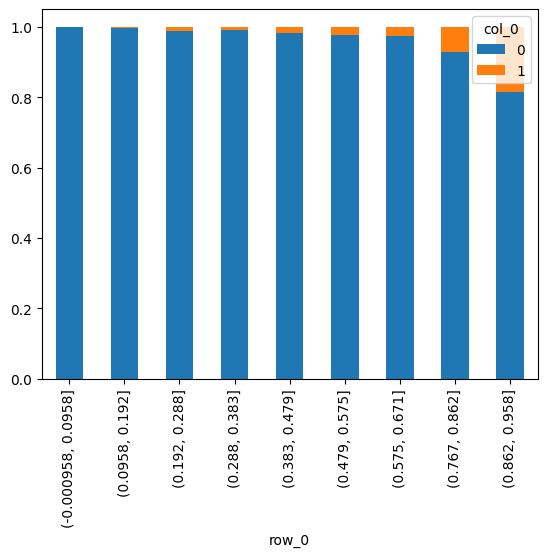

In [ ]:
# Things are becoming more interesting
# let's have a deeper look at what happens
# in each score bin
# step 1 - we bin scores
score_test_3_bin = pd.cut(score_test_3[:,1], 10)
# step 2 - we compute crosstab between score bins and target variable
# we then look at row marginal
score_test_3_analysis = pd.crosstab(score_test_3_bin, test_y[:,0], normalize = 'index')
print(score_test_3_analysis) # what do we see?
# step 3 - we can plot to confirm what we saw in the crosstab
score_test_3_analysis.plot.bar(stacked=True)


In [ ]:
# in case we want to save (serialize) out models
# import pickle
# open a file, where you want to store the data
# file = open('dtc.pickle', 'wb')

# dump information to that file
# pickle.dump(dtc, file)

# close the file
# file.close()

In [ ]:
from math import exp
# in case we want to serialize the datasets
import pickle
def export_pickle(_object, _file_name):
  _file_name = '/content/drive/MyDrive/Colab Notebooks/00 - Lecture prototypes/2023_01 - churn banking lecture/' + _file_name + '.pickle'
  _file = open(_file_name, 'wb')
  pickle.dump(_object, _file)
  _file.close()

export_pickle(train_X, 'train_X')
export_pickle(train_y, 'train_y')
export_pickle(test_X, 'test_X')
export_pickle(test_y, 'test_y')

export_pickle(dtc , 'dtc_eng')
export_pickle(dtc2, 'dtc2_eng')
export_pickle(dtc3, 'dtc3_eng')


# Phase 3 - Evaluation

In [ ]:
# scikitplot seems not to work anymore (september 2024)
# !pip install scikit-plot

# the scikit-plot package is not mantained anymore
# workaround n.1 - install an old version of scipy
# !pip install scipy==1.11.4
# !pip install scikit-plot

# workaround n. 2 - install this for of scikit-plot that is maintained by someone
# that keeps it somehow updated
!pip install mljar-scikit-plot

  Preparing metadata (setup.py) ... done
  Created wheel for mljar-scikit-plot: filename=mljar_scikit_plot-0.3.12-py3-none-any.whl size=32014 sha256=1e7525a3ae6700223da6194f6cb2a926394f4948dc55181363ea8fb937fee574
  Stored in directory: /root/.cache/pip/wheels/f1/02/59/22b0e9bcc992a79df54193032d45720f9713bd3065617ef4a5
Successfully built mljar-scikit-plot


<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

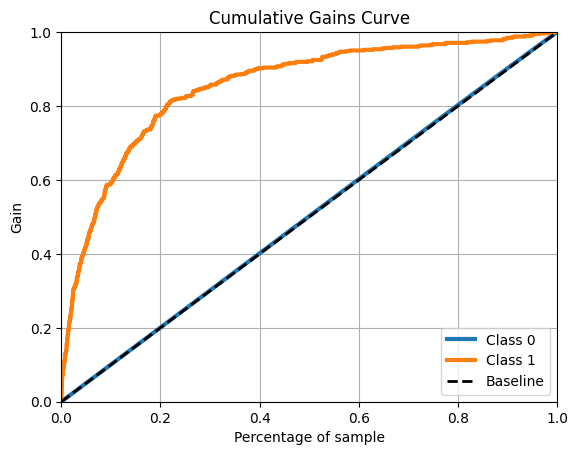

In [ ]:



# now that we have a little better tree let's continue evaluating
# let's plot ROC curve
import scikitplot as skplt
# maybe we need "pip install scikit-plot"
# or, under colab/jupyter, !pip install scikit-plot
# skplt.metrics.plot_roc(test_y, score_test_3, title = "ROC Curve", plot_micro  = False, plot_macro  = False, classes_to_plot=[1] )
# in case i want to plot the cumulative gains chart
# skplt.metrics.plot_cumulative_gain(test_y, score_test)
# skplt.metrics.plot_cumulative_gain(test_y, score_test_2)
skplt.metrics.plot_cumulative_gain(test_y, score_test_3)


In [ ]:
# detailed ROC curve
# we get the data
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y, score_test_3[:,1], pos_label=1, drop_intermediate=(True))
# we put such data in a data frame (for readability)
roc_analysis = pd.DataFrame()
roc_analysis['threshold'] = thresholds
roc_analysis['fpr'] = fpr
roc_analysis['tpr'] = tpr
# roc_analysis



In [ ]:
## Feature Importance
feat_importances = dtc3.feature_importances_
analisi_feature_importance = pd.DataFrame()
analisi_feature_importance ['nome'] = features_names
analisi_feature_importance ['imp'] = feat_importances
analisi_feature_importance.sort_values('imp', ascending = False, inplace= True)
# analisi_feature_importance
##############################################################################

# Phase 4 - Presenting ROI to Business Users




In [28]:
# Model ROI analysis
# hypotizing Costs and Benefits
contact_cost = 1
revenue_profit = 40


In [27]:
# preparing our analysis table
analisi_roi = pd.DataFrame()
analisi_roi['target'] = test_y[:,0]
analisi_roi['score']= score_test_3[:,1]
# we need "predefined" score bins - classes
# class_score = np.linspace(0.0,1.0,num=10, endpoint=True)
import numpy as np
class_score = np.arange(0.0,1.01,step=0.01)

In [29]:
analisi_roi

,target,score
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
...,...,...
113206,0,0.000000
113207,0,0.516667
113208,0,0.363636
113209,0,0.030769


In [30]:
# we bin scores according to predefined classes
analisi_roi['score_bin'] = pd.cut(analisi_roi['score'],bins=class_score,labels=False, include_lowest=True)
# let's have a look at the score bins
analisi_roi.score_bin.value_counts(dropna=False).sort_index()


,count
score_bin,
0,49562
1,1648
2,1420
3,6748
4,1163
5,5893
6,2968
7,2597
8,3614


In [31]:
analisi_roi

,target,score,score_bin
0,0,0.000000,0
1,0,0.000000,0
2,0,0.000000,0
3,0,0.000000,0
4,0,0.000000,0
...,...,...,...
113206,0,0.000000,0
113207,0,0.516667,51
113208,0,0.363636,36
113209,0,0.030769,3


In [32]:

# we count the number of real positives in the test sample
tot_positivi_test = np.sum(test_y == 1)

# let's compute the results for each score bin
# we group by score_bin
analisi_roi_agg = analisi_roi.groupby('score_bin').agg(segnalati=('target','count'),hit=('target','sum'))
analisi_roi_agg.sort_values('score_bin', ascending=False, inplace=True)



In [35]:
analisi_roi_agg

,segnalati,hit
score_bin,,
98,127,23
91,112,20
89,229,28
87,298,23
81,672,30
68,577,21
66,291,9
65,325,14
60,569,20


In [36]:
# we compute some cumulative sum
analisi_roi_agg['segnalati_cum'] = analisi_roi_agg['segnalati'].cumsum()
analisi_roi_agg['hit_cum'] = analisi_roi_agg['hit'].cumsum()




In [37]:
analisi_roi_agg

,segnalati,hit,segnalati_cum,hit_cum
score_bin,,,,
98,127,23,127,23
91,112,20,239,43
89,229,28,468,71
87,298,23,766,94
81,672,30,1438,124
68,577,21,2015,145
66,291,9,2306,154
65,325,14,2631,168
60,569,20,3200,188


In [38]:
# we compute the metrics we care about
analisi_roi_agg['precision'] = analisi_roi_agg['hit_cum'] / analisi_roi_agg['segnalati_cum']
analisi_roi_agg['recall']    = analisi_roi_agg['hit_cum'] / tot_positivi_test
analisi_roi_agg['tot_contact_cost'] = analisi_roi_agg['segnalati_cum'] * contact_cost
analisi_roi_agg['tot_revenue_profit'] = analisi_roi_agg['hit_cum'] * revenue_profit


In [39]:
# we compute the final ROI
analisi_roi_agg['roi'] = analisi_roi_agg['tot_revenue_profit'] - analisi_roi_agg['tot_contact_cost']

# what do we see? Which is the optimal threshold?
# what can we say to Marketing Boss?
analisi_roi_agg

,segnalati,hit,segnalati_cum,hit_cum,precision,recall,tot_contact_cost,tot_revenue_profit,roi
score_bin,,,,,,,,,
98,127,23,127,23,0.181102,0.039384,127,920,793
91,112,20,239,43,0.179916,0.073630,239,1720,1481
89,229,28,468,71,0.151709,0.121575,468,2840,2372
87,298,23,766,94,0.122715,0.160959,766,3760,2994
81,672,30,1438,124,0.086231,0.212329,1438,4960,3522
68,577,21,2015,145,0.071960,0.248288,2015,5800,3785
66,291,9,2306,154,0.066782,0.263699,2306,6160,3854
65,325,14,2631,168,0.063854,0.287671,2631,6720,4089
60,569,20,3200,188,0.058750,0.321918,3200,7520,4320
